In [4]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [3]:
# Mapping target values to class names
data['target'] = data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [7]:
data.value_counts('target')

,count
target,
0,50
1,50
2,50


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-9-9cfdcdb44660>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


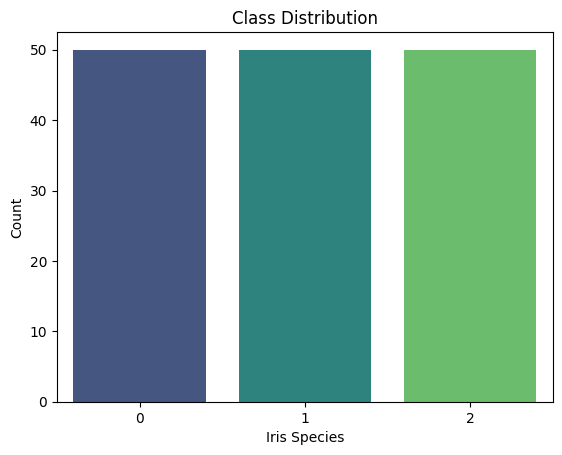

In [9]:
sns.countplot(x='target', data=data, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Iris Species')
plt.ylabel('Count')
plt.show()

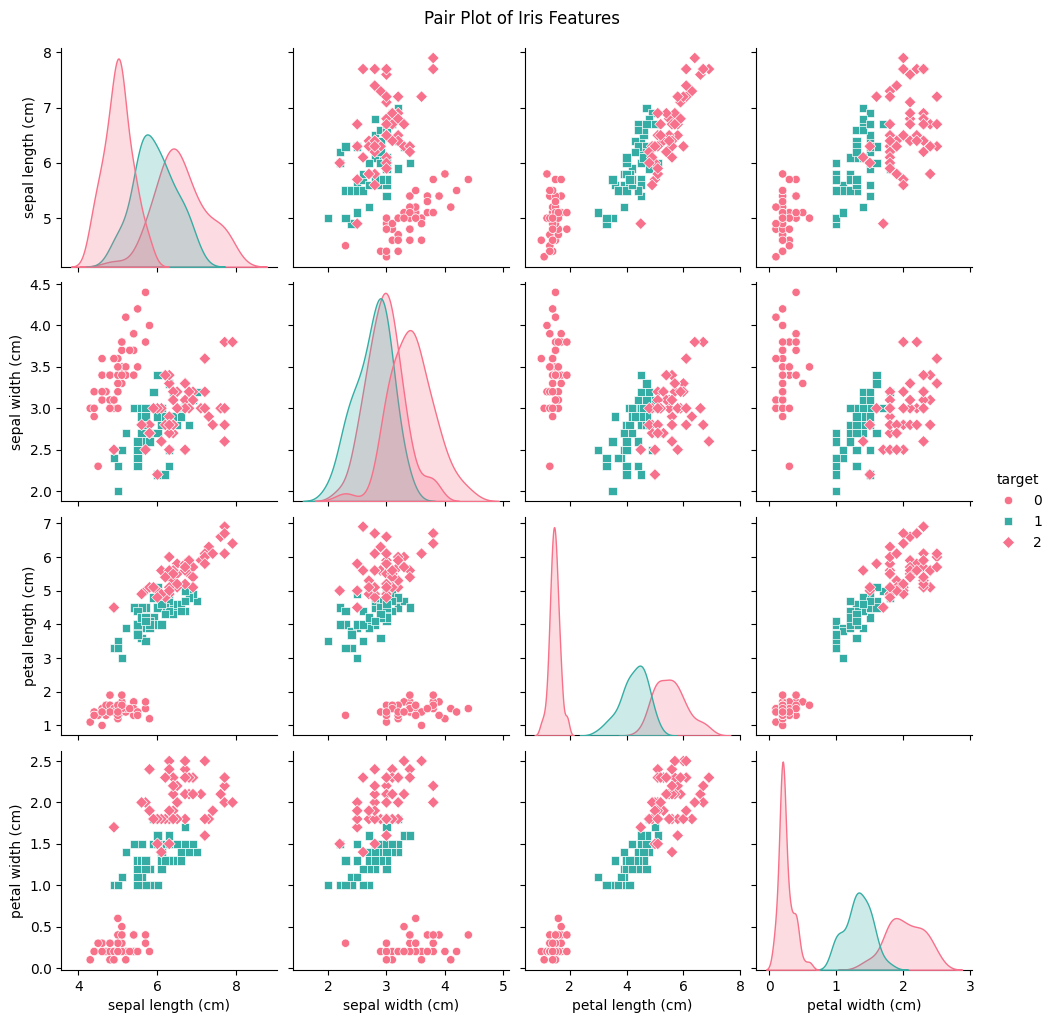

In [10]:
sns.pairplot(data, hue='target', markers=["o", "s", "D"], palette='husl')
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()

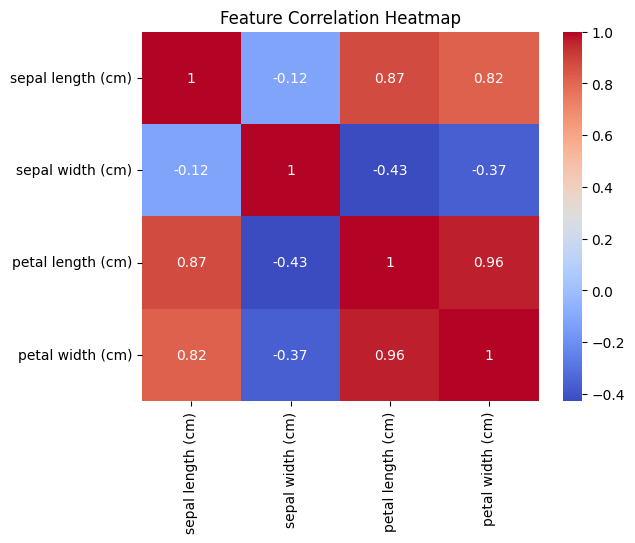

In [11]:
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x=data.drop('target',axis=1)
y=data['target']

In [14]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
model=RandomForestClassifier(n_estimators=20,max_depth=5)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [18]:
y_pred=model.predict(x_test)

In [19]:
accuracy_score(y_test,y_pred)

1.0

In [20]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       1.00      1.00      1.00         9\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [21]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

We have achieved 100% accuracy...